In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
import graphviz
import dtreeviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd
import numpy as np
import pickle
import os
from pypinyin import pinyin

In [2]:
def convert(words):
    py = pinyin(words)
    res = ""
    for i in py:
       res+=i[0][0].upper()
    return res

In [3]:
# sdt
dataset = pd.read_csv('../../../data/csv_file/feature_table_result.csv')
dataset.dropna(inplace=True)
sdt_data = pd.DataFrame(dataset[dataset['土类'] == "水稻土"])
sdt_data["SC2_label"] = sdt_data.SC2.astype("category").cat.codes
sdt_data["DL_label"] = sdt_data.DL.astype("category").cat.codes
sdt_data["DZ_label"] = sdt_data.DZ.astype("category").cat.codes
sdt_data["TL_label"] = sdt_data.土类.astype("category").cat.codes
sdt_data["YL_label"] = sdt_data.亚类.astype("category").cat.codes
sdt_data["TS_label"] = sdt_data.土属.astype("category").cat.codes
sdt_data["TZ_label"] = sdt_data.土种.astype("category").cat.codes
sdt_target = 'TZ_label'
features = ['DEM', 'TWI5', 'TPI201', 'TMP','SLOP', 'PRE', 'NIGTH', 'NDVI','PH', 'SOM', 'SC2_label', 'DL_label', 'DZ_label']
sdtX = sdt_data[features]
sdty = sdt_data[sdt_target]
sdtX_train, sdtX_test, sdty_train, sdty_test = train_test_split(sdtX, sdty, test_size=0.2, random_state=52)

In [4]:
sdt_result = sdt_data.groupby('TZ_label')["土种"].apply(lambda x: list(x.unique())).to_dict()

In [5]:
# 通过网格搜索找到最优超参数
sdt_params = {'criterion':['gini','entropy'], 'max_depth':list(range(2,100))} 
sdt_grid_tree = GridSearchCV(DecisionTreeClassifier(), sdt_params, cv=5)
sdt_grid_tree.fit(sdtX_train, sdty_train)
print(sdt_grid_tree.best_params_)

d:\Program Files\ArcGIS\Clone_env2\arcgispro-py3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.


{'criterion': 'entropy', 'max_depth': 5}


In [6]:

sdt_tree_classifier = DecisionTreeClassifier(random_state=42,**sdt_grid_tree.best_params_)
sdt_tree_classifier.fit(sdtX_train, sdty_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [7]:
# 查看准确率
sdt_y_test_pred= sdt_tree_classifier.predict(sdtX_test)
sdt_y_train_pred = sdt_tree_classifier.predict(sdtX_train)
accuracy_test = accuracy_score(sdty_test,sdt_y_test_pred)
accuracy_train = accuracy_score(sdty_train,sdt_y_train_pred)
print(accuracy_train,accuracy_test)

0.6572769953051644 0.3333333333333333


In [8]:
# 画图
sdt_model = dtreeviz.model(sdt_tree_classifier,
                           X_train=sdtX_train, y_train=sdty_train,
                           feature_names=features,
                           target_name=sdt_target, class_names=[convert(sdt_result[_][0]) for _ in sdt_result])

d:\Program Files\ArcGIS\Clone_env2\arcgispro-py3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


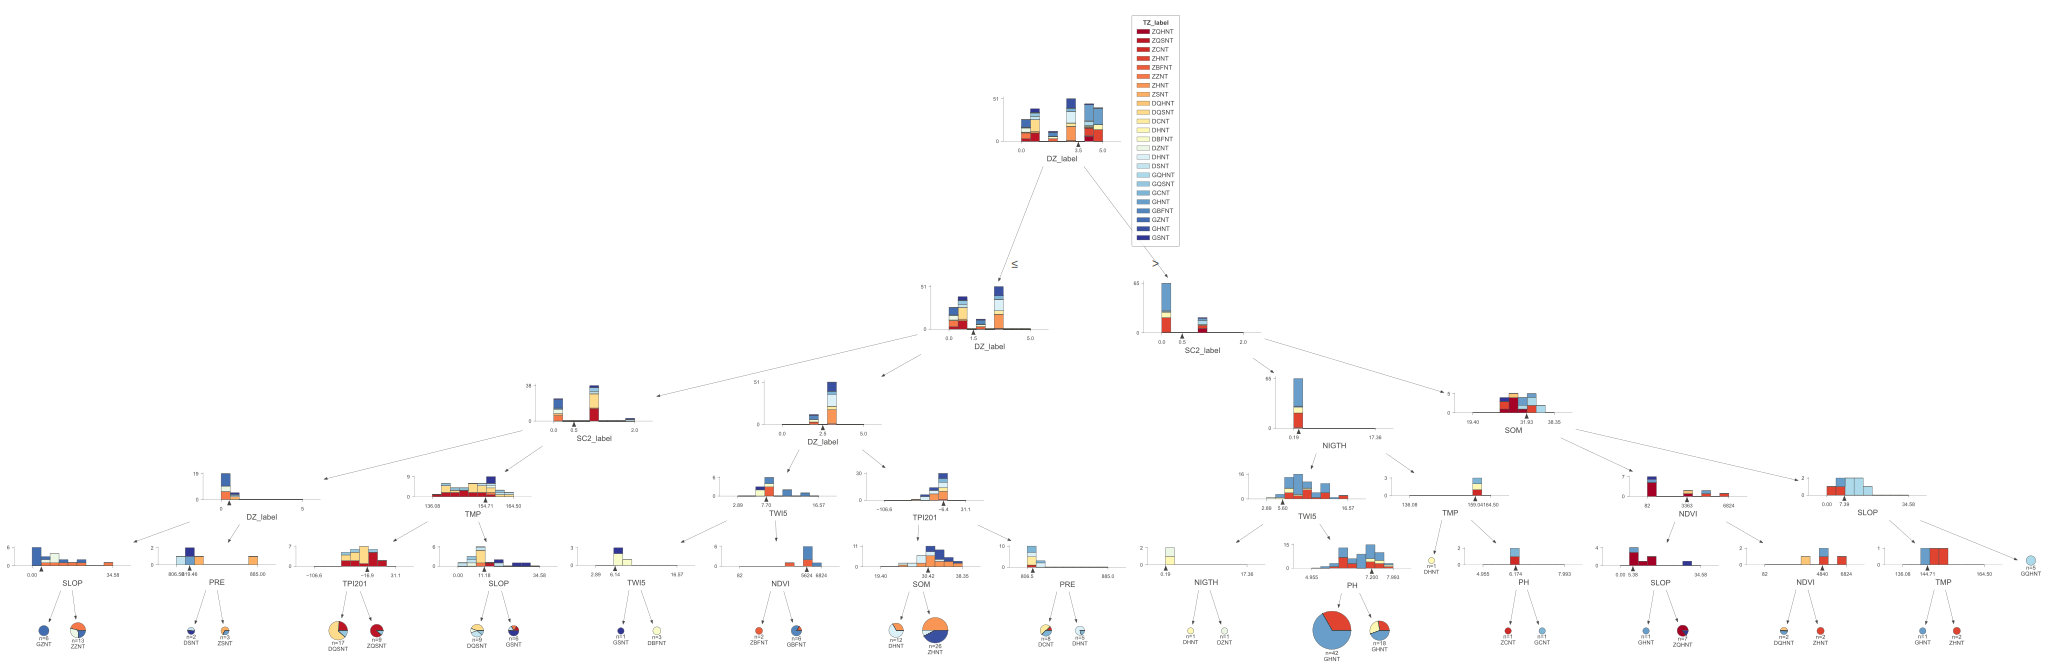

In [9]:
sdt_model.view()

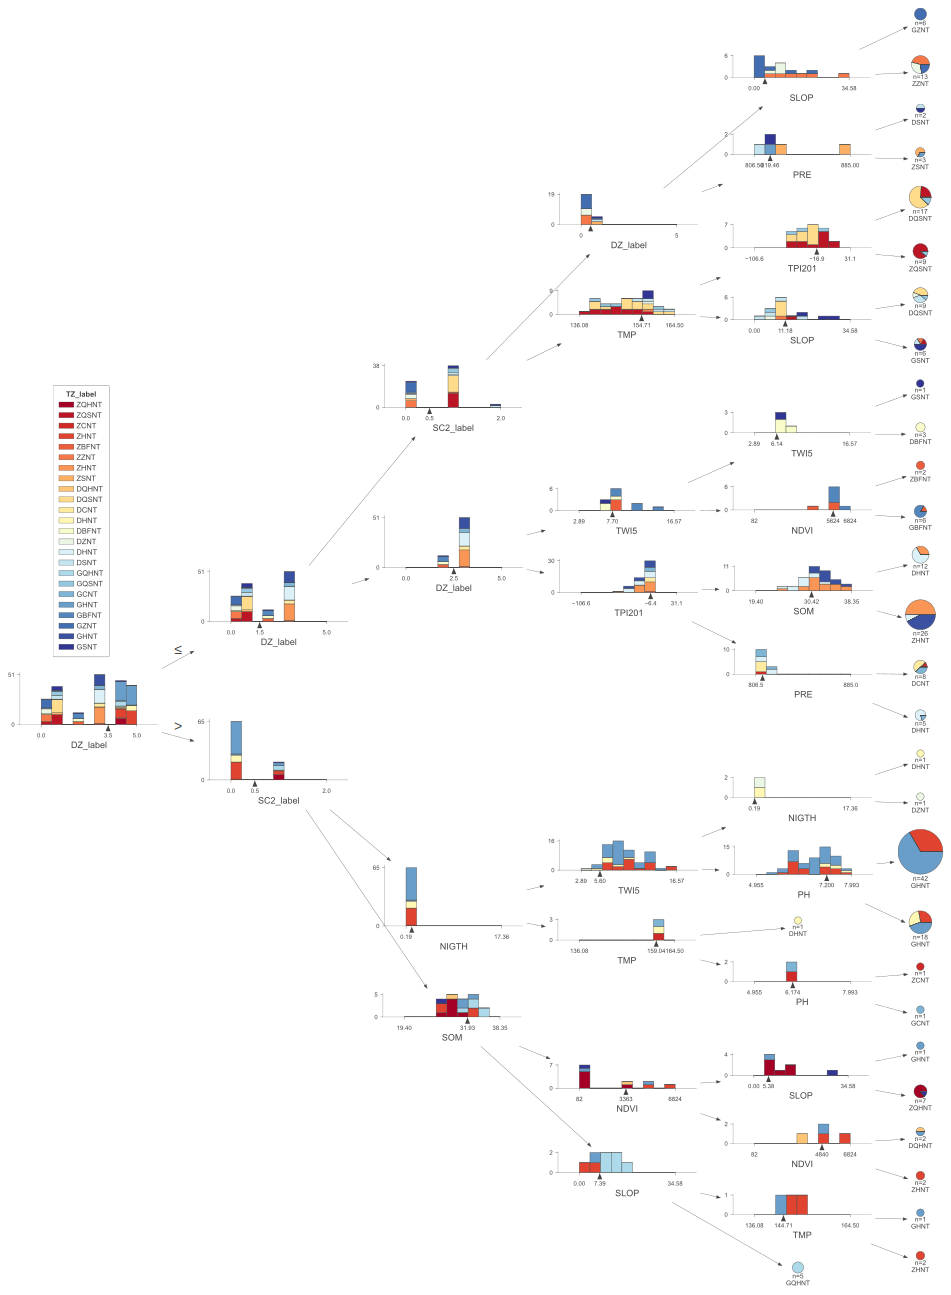

In [10]:
sdt_model.view(orientation="LR")

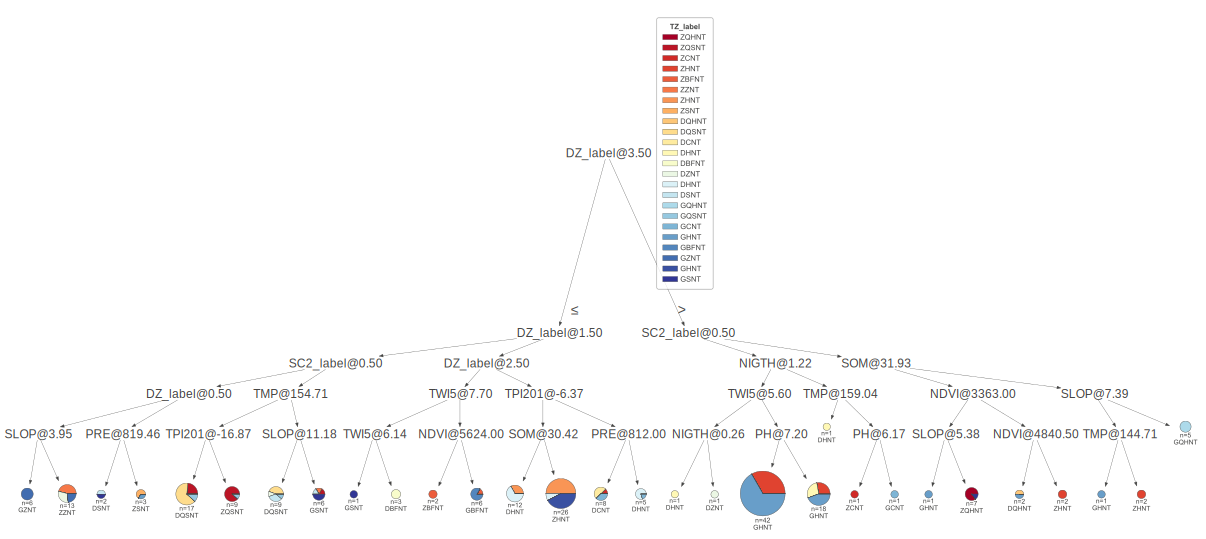

In [11]:
sdt_model.view(fancy=False)